In [23]:
include("../src/include_file.jl")

extendInitialDataToLinear (generic function with 1 method)

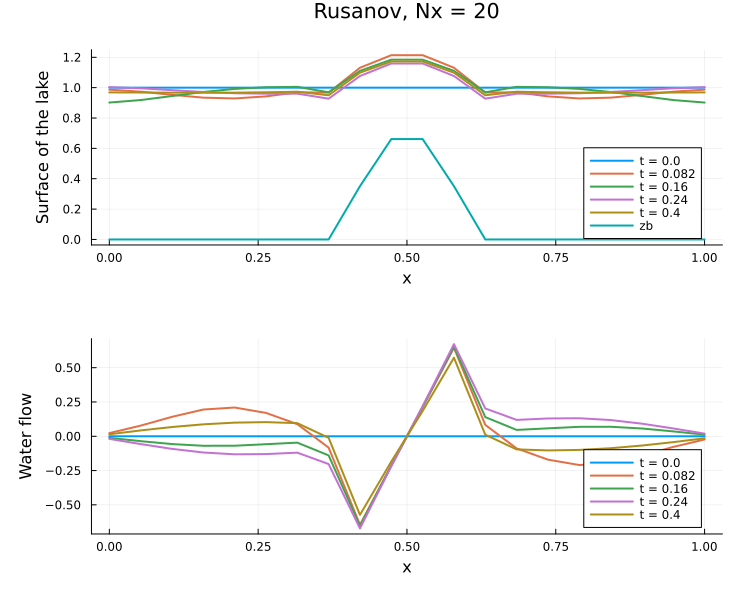

nothing

typeof(res) = Vector{Float64}


In [25]:
# Domain definition with a bump topography

topography = bump_zb(width=0.05, height=0.7)
Nx, t0, Tf = 20, 0, 0.4
CFL_factor = 0.5
domain = createUnitInterval(Nx, t0, Tf)
eq = SaintVenant(topography, 1e-10)
addSource!(eq.source, domain)

method = Rusanov(CFL_factor)

v0 = v0_lake_at_rest(domain.x, topography)
#v0 = v0_lake_at_rest_perturbated(domain.x, topography, xleft=0.25, xright=0.3)

solSV = fv_solve(domain, v0, eq, method)
nb_plots = 5
display(plot_fv_sol(solSV, solSV.equation; nb_plots=nb_plots, plotMode=DisplayMode()))

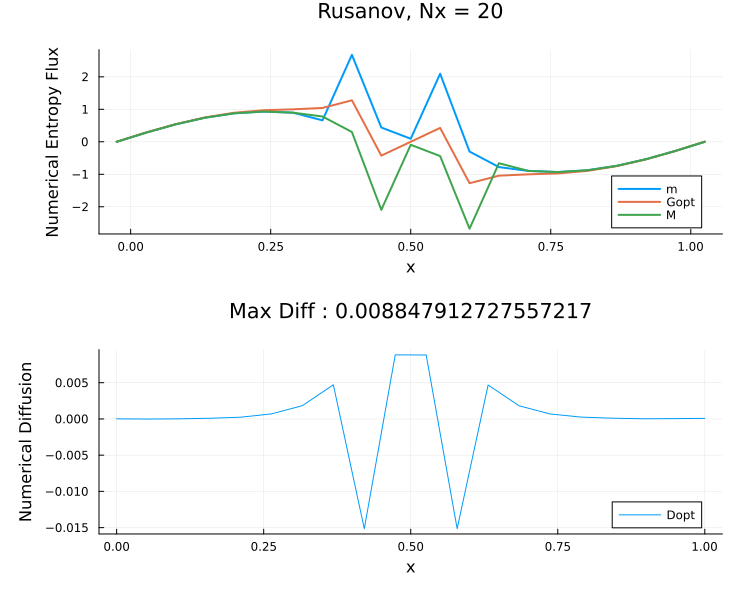

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:294 =#
                J(gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: success

 * Candidate solution
    Final objective value:     1.795348e-03

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    370
    f(x) calls:    634

Maximal diffusion value : 0.008847912727557217


nothing

In [26]:
solEnt = optimize_for_entropy(v0, domain, eq, method, modifiedDataType=meanK(1,1), iterations=100000, g_tol=1e-8)
display(plot_solution(solEnt))

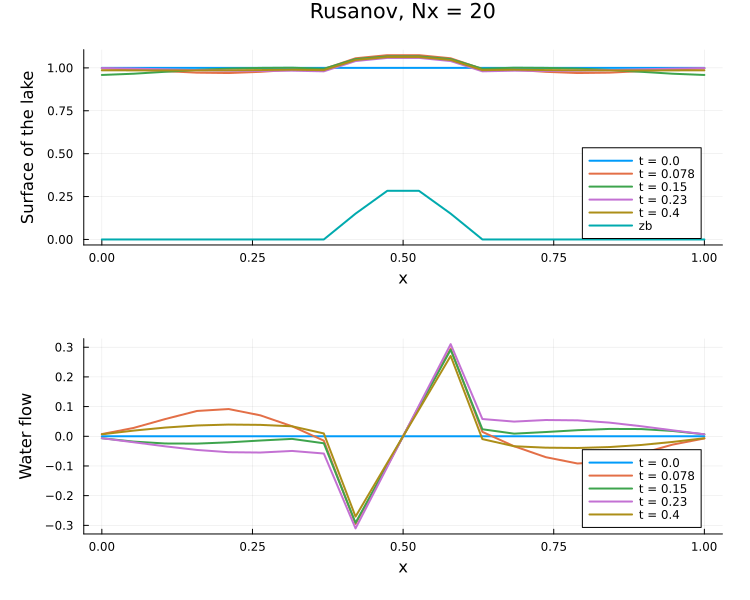

nothing

typeof(res) = Vector{Float64}
sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:294 =#
                J(gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: success

 * Candidate solution
    Final objective value:     1.541436e-03

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1401
    f(x) calls:    1856

Maximal diffusion value : 0.007272939273565349


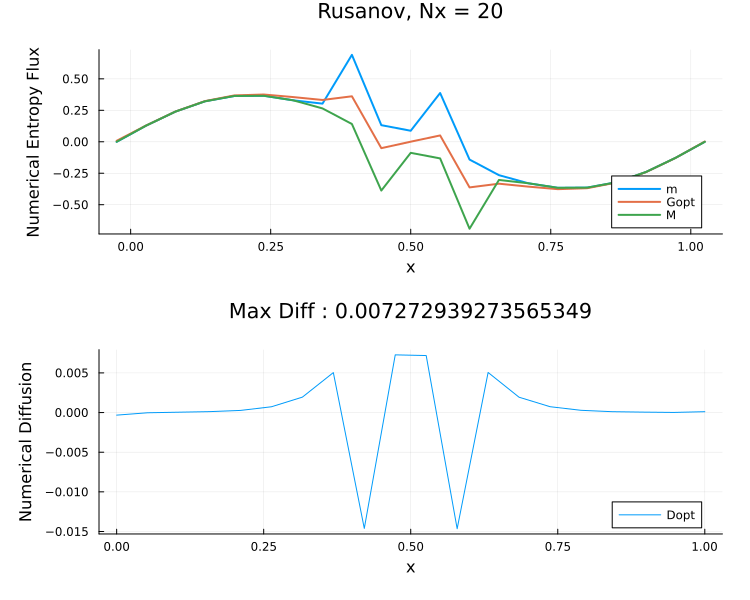

nothing

In [27]:
# With a smaller bump

topography = bump_zb(width=0.05, height=0.3)
Nx, t0, Tf = 20, 0, 0.4
CFL_factor = 0.5
domain = createUnitInterval(Nx, t0, Tf)
eq = SaintVenant(topography, 1e-10)
addSource!(eq.source, domain)

method = Rusanov(CFL_factor)

v0 = v0_lake_at_rest(domain.x, topography)
#v0 = v0_lake_at_rest_perturbated(domain.x, topography, xleft=0.25, xright=0.3)

solSV = fv_solve(domain, v0, eq, method)
nb_plots = 5
display(plot_fv_sol(solSV, solSV.equation; nb_plots=nb_plots, plotMode=DisplayMode()))

solEnt = optimize_for_entropy(v0, domain, eq, method, modifiedDataType=meanK(1,1), iterations=100000, g_tol=1e-8)
display(plot_solution(solEnt))

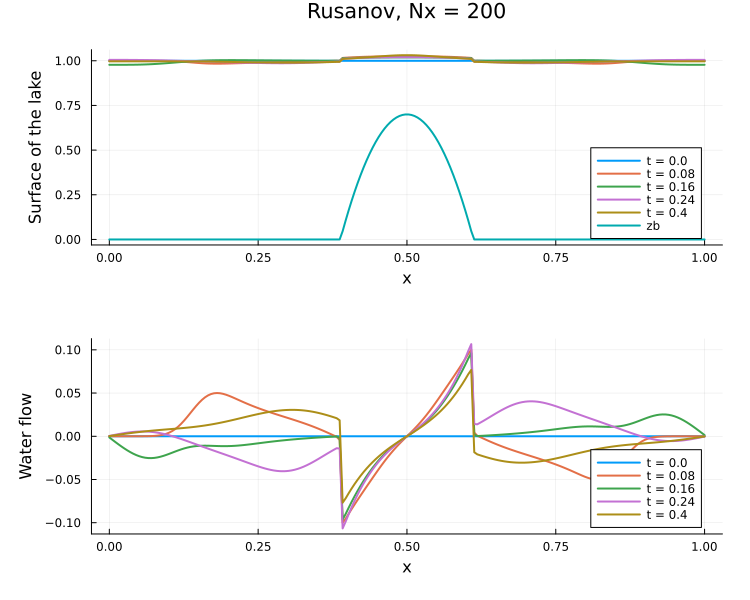

nothing

typeof(res) = Vector{Float64}
sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:294 =#
                J(gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: success

 * Candidate solution
    Final objective value:     6.335121e-03

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   16  (vs limit Inf)
    Iterations:    7646
    f(x) calls:    10832

Maximal diffusion value : 0.0033623948856009453


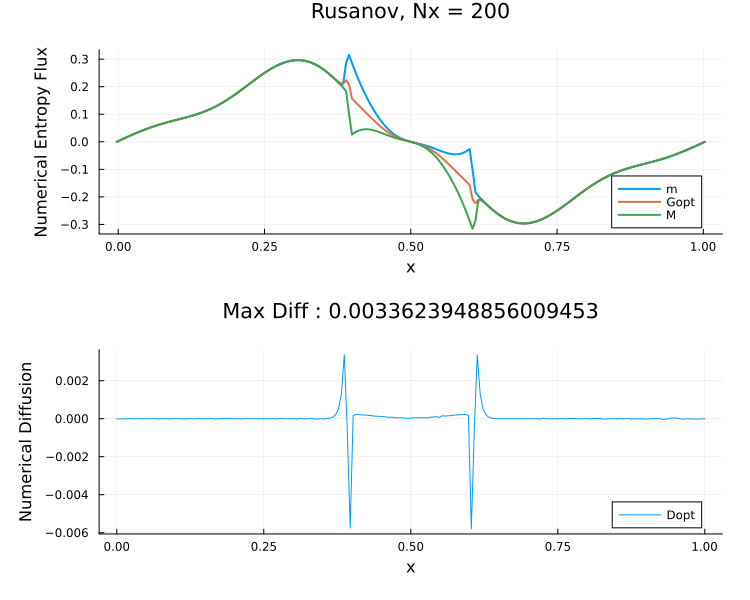

nothing

In [29]:
# With a smaller space step

topography = bump_zb(width=0.05, height=0.7)
Nx, t0, Tf = 200, 0, 0.4
CFL_factor = 0.5
domain = createUnitInterval(Nx, t0, Tf)
eq = SaintVenant(topography, 1e-10)
addSource!(eq.source, domain)

method = Rusanov(CFL_factor)

v0 = v0_lake_at_rest(domain.x, topography)
#v0 = v0_lake_at_rest_perturbated(domain.x, topography, xleft=0.25, xright=0.3)

solSV = fv_solve(domain, v0, eq, method)
nb_plots = 5
display(plot_fv_sol(solSV, solSV.equation; nb_plots=nb_plots, plotMode=DisplayMode()))

solEnt = optimize_for_entropy(v0, domain, eq, method, modifiedDataType=meanK(1,1), iterations=100000, g_tol=1e-8)
display(plot_solution(solEnt))

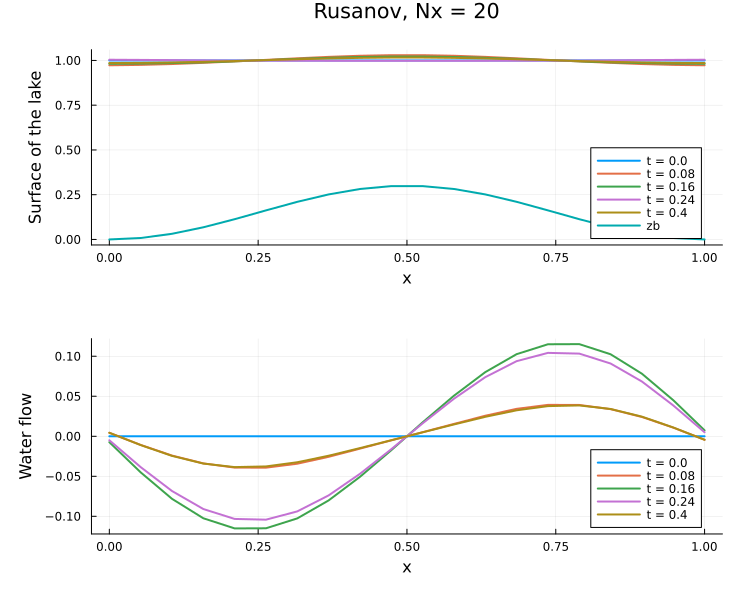

nothing

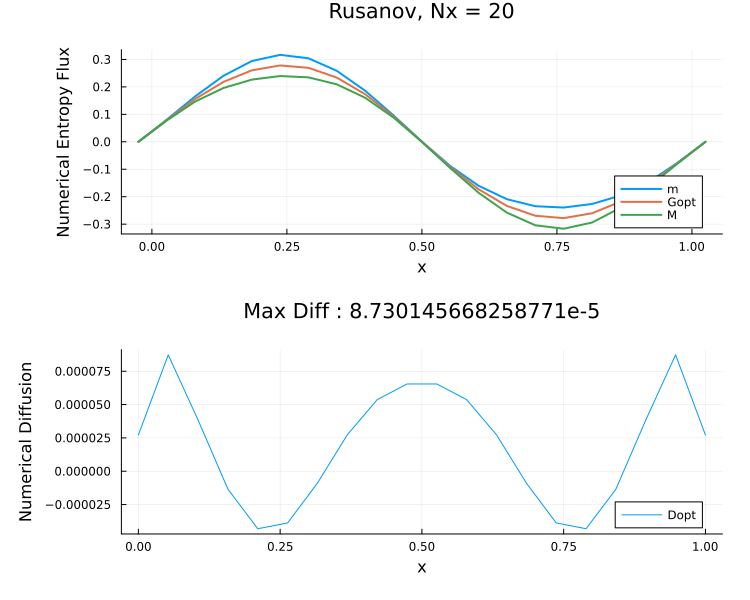

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:294 =#
                J(gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: success

 * Candidate solution
    Final objective value:     6.297911e-06

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    222
    f(x) calls:    410

Maximal diffusion value : 8.730145668258771e-5


nothing

In [12]:
# With a sinusoidal topography

#topography = bump_zb(width=0.05, height=0.3)
topography = sinus_zb(height=0.3)
Nx, t0, Tf = 20, 0, 0.4
CFL_factor = 0.5
domain = createUnitInterval(Nx, t0, Tf)
eq = SaintVenant(topography, 1e-10)
addSource!(eq.source, domain)

method = Rusanov(CFL_factor)

v0 = v0_lake_at_rest(domain.x, topography)
#v0 = v0_lake_at_rest_perturbated(domain.x, topography, xleft=0.25, xright=0.3)

plot(domain.x, v0[:,1] +domain.sourceVec, label="surface")
plot!(domain.x, domain.sourceVec, label="z")

solSV = fv_solve(domain, v0, eq, method)
nb_plots = 5
display(plot_fv_sol(solSV, solSV.equation; nb_plots=nb_plots, plotMode=DisplayMode()))

solEnt = optimize_for_entropy(v0, domain, eq, method, modifiedDataType=meanK(1,1), iterations=10000, g_tol=1e-8)
display(plot_solution(solEnt))